In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import qiskit
from qiskit import IBMQ, QuantumCircuit, execute, transpile, assemble, Aer, ClassicalRegister, QuantumRegister
from qiskit.result import marginal_counts
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.tools.monitor import job_monitor

In [3]:
#The quantum strategy is given by the presentation

In [4]:
# In this demo, as an example, the alpha and beta variables are set as below.
# alpha 4 ~ alpha m = +1, beta 4 ~ beata n = +1, 
# alpha 1 prime = alpha 2 = +1, alpha 3 = -1
# beta 1 prime = beta 2 = beta 3 = -1
# For simplicity, Let's say Referee assigns only one of first 3 rows to Alice and one of first 3 columns to Bob since for the ohter rows and columns, the results are trival by the strategy.  
# Then this specific demo is equivalent to the case of 3x3 magic square game.***

# Functions used in the demo

# U and V are circuit components that represent observables, i.e. the strategy.
def U(t):
    qc_U = QuantumCircuit(4)
    if t == 0:
        qc_U.h(range(2))
    elif t == 1:
        qc_U.swap(0, 1)
    elif t == 2:
        qc_U.z(range(2))
        qc_U.cz(0,1)
        qc_U.h(range(2))
    return qc_U

def V(t):
    qc_V = QuantumCircuit(4)
    if t == 0:
        qc_V.h(2)
    elif t == 1:
        qc_V.swap(2, 3)
        qc_V.h(2)
    elif t == 2:
        qc_V.cx(2,3)
        qc_V.h(2)
    return qc_V

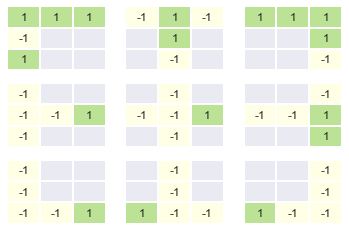

In [5]:
#Run on a simulator

# Simulation for the 3x3=9 row and column pairs
fig, axs = plt.subplots(3, 3)
plt.title("", fontsize=12)

for i in range(3):
    for j in range(3):
        
        # Generate two Bell states
        qc = QuantumCircuit(4,4)
        qc.h(range(2))
        qc.cx(0,2)
        qc.cx(1,3)
        
        qc_ob = qc.compose(U(i)).compose(V(j))
        
        for l in range(4):
            qc_ob.barrier()
            qc_ob.measure(l,l)
        
        simulator = Aer.get_backend('qasm_simulator') #you can also use other simulators. ex) 'statevector_simulator', 'aer_simulator'
        mapped_qc_ob = transpile(qc_ob, backend=simulator)
        qobj = assemble(mapped_qc_ob, backend=simulator, shots=1)
        job = simulator.run(qobj)
        
        q0_post = marginal_counts(job.result(), indices=[0]).get_counts()
        q1_post = marginal_counts(job.result(), indices=[1]).get_counts()
        q2_post = marginal_counts(job.result(), indices=[2]).get_counts()
        q3_post = marginal_counts(job.result(), indices=[3]).get_counts()
                
        q01_posts = [list(q0_post)[0], list(q1_post)[0]]
        q23_posts = [list(q2_post)[0], list(q3_post)[0]]
        
        Alice_row = []
        Bob_column = []
        
        for n in range(len(q01_posts)):
            if q01_posts[n] == '0':
                Alice_row.append(1)
            else: Alice_row.append(-1)
        Alice_row.append(1 * Alice_row[0] * Alice_row[1])
        
        for n in range(len(q23_posts)):
            if q23_posts[n] == '0':
                Bob_column.append(1)
            else: Bob_column.append(-1)
        Bob_column.append(-1 * Bob_column[0] * Bob_column[1])
        
        Magic_square = np.zeros((3,3))
        mask = np.ones((3,3))
        
        for k in range(3):
            Magic_square[i,k] = Alice_row[k]
            Magic_square[k,j] = Bob_column[k]
            mask[i,k] = 0
            mask[k,j] = 0
            
        #Visualize a numpy array in python using seaborn        
        sns.heatmap(Magic_square, ax=axs[i,j], cmap="YlGn", mask=mask, linewidths=.10, center=2, annot=True, cbar=None, xticklabels=False, yticklabels=False)     

In [6]:
from qiskit import IBMQ
IBMQ.enable_account('8ba2543d39b8295256079c0e8bfcfdb130e2b49a5734ecb4f094d05edb25994cbb8124761d627575f10165b1c12b2c90d25537427879ce1431eb11fad2a46ac0')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
#IBMQ.providers()

In [8]:
provider = IBMQ.get_provider(hub='ibm-q-education', group='ibm-quantum-1', project='quantum-hackatho')

In [2]:
#provider.backends()

In [9]:
backend = provider.get_backend('ibm_lagos')

<ipython-input-10-f9cd6ba9ab3f>:24: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


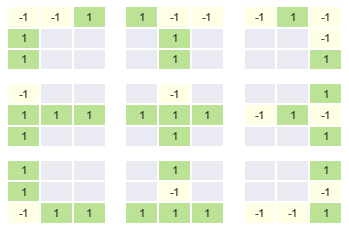

In [10]:
#Run on a real backend ('ibmq_')

# Simulation for the 3x3=9 row and column pairs
fig, axs = plt.subplots(3, 3)
plt.title("", fontsize=12)

for i in range(3):
    for j in range(3):
        
        # Generate two Bell states
        qc = QuantumCircuit(4,4)
        qc.h(range(2))
        qc.cx(0,2)
        qc.cx(1,3)
        
        qc_ob = qc.compose(U(i)).compose(V(j))
        
        for l in range(4):
            qc_ob.barrier()
            qc_ob.measure(l,l)
        
        mapped_qc_ob = transpile(qc_ob, backend=backend)
        qobj = assemble(mapped_qc_ob, backend=backend, shots=1)
        job = backend.run(qobj)
        
        q0_post = marginal_counts(job.result(), indices=[0]).get_counts()
        q1_post = marginal_counts(job.result(), indices=[1]).get_counts()
        q2_post = marginal_counts(job.result(), indices=[2]).get_counts()
        q3_post = marginal_counts(job.result(), indices=[3]).get_counts()
                
        q01_posts = [list(q0_post)[0], list(q1_post)[0]]
        q23_posts = [list(q2_post)[0], list(q3_post)[0]]
        
        Alice_row = []
        Bob_column = []
        
        for n in range(len(q01_posts)):
            if q01_posts[n] == '0':
                Alice_row.append(1)
            else: Alice_row.append(-1)
        Alice_row.append(1 * Alice_row[0] * Alice_row[1])
        
        for n in range(len(q23_posts)):
            if q23_posts[n] == '0':
                Bob_column.append(1)
            else: Bob_column.append(-1)
        Bob_column.append(-1 * Bob_column[0] * Bob_column[1])
        
        Magic_square = np.zeros((3,3))
        mask = np.ones((3,3))
        
        for k in range(3):
            Magic_square[i,k] = Alice_row[k]
            Magic_square[k,j] = Bob_column[k]
            mask[i,k] = 0
            mask[k,j] = 0
            
        #Visualize a numpy array in python using seaborn        
        sns.heatmap(Magic_square, ax=axs[i,j], cmap="YlGn", mask=mask, linewidths=.10, center=2, annot=True, cbar=None, xticklabels=False, yticklabels=False)     